In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
'''
Defining Generator function
'''
train_data=keras.preprocessing.image_dataset_from_directory(
    directory='/kaggle/input/confident-unconfident/confident-unconfident/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_data=keras.preprocessing.image_dataset_from_directory(
    directory='//kaggle/input/confident-unconfident/confident-unconfident/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 28707 files belonging to 2 classes.
Found 7178 files belonging to 2 classes.


In [3]:
def normalize(img,label):
  img=tf.cast(img/255.,tf.float32)
  return img,label

train_data=train_data.map(normalize)
validation_data=validation_data.map(normalize)

In [4]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization()) #Batch Normalization
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization()) #Batch Normalization
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization()) #Batch Normalization
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1)) #Dropout
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1)) #Dropout
model.add(Dense(1,activation='sigmoid'))

In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
history=model.fit(train_data, epochs=10,validation_data=validation_data)

Epoch 1/10
898/898 [==============================] - 93s 91ms/step - loss: 1.5622 - accuracy: 0.5763 - val_loss: 0.6303 - val_accuracy: 0.6435
Epoch 2/10
898/898 [==============================] - 48s 53ms/step - loss: 0.6526 - accuracy: 0.6251 - val_loss: 0.6185 - val_accuracy: 0.6539
Epoch 3/10
898/898 [==============================] - 48s 53ms/step - loss: 0.6340 - accuracy: 0.6478 - val_loss: 0.6107 - val_accuracy: 0.6521
Epoch 4/10
898/898 [==============================] - 48s 53ms/step - loss: 0.6419 - accuracy: 0.6380 - val_loss: 0.6090 - val_accuracy: 0.6655
Epoch 5/10
898/898 [==============================] - 48s 53ms/step - loss: 0.6171 - accuracy: 0.6534 - val_loss: 0.6687 - val_accuracy: 0.5833
Epoch 6/10
898/898 [==============================] - 48s 53ms/step - loss: 0.6056 - accuracy: 0.6667 - val_loss: 0.6327 - val_accuracy: 0.6240
Epoch 7/10
898/898 [==============================] - 48s 53ms/step - loss: 0.5975 - accuracy: 0.6719 - val_loss: 0.9057 - val_accuracy:

In [7]:
loss, accuracy = model.evaluate(train_data, verbose=1)
loss_v, accuracy_v = model.evaluate(validation_data, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

225/225 [==============================] - 5s 19ms/step - loss: 0.5702 - accuracy: 0.7144
Validation: accuracy = 0.714405  ;  loss_v = 0.570233
Test: accuracy = 0.760825  ;  loss = 0.478778


In [8]:
model.save("teacher_confidence.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


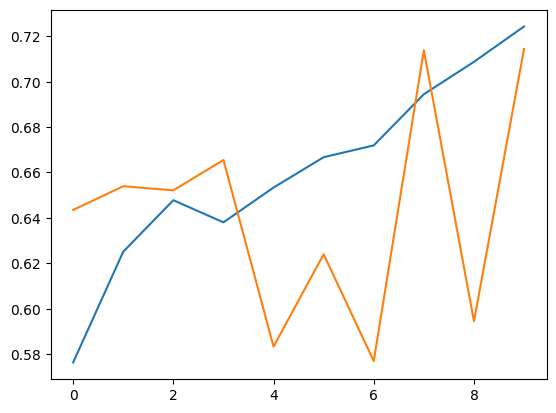

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.show()

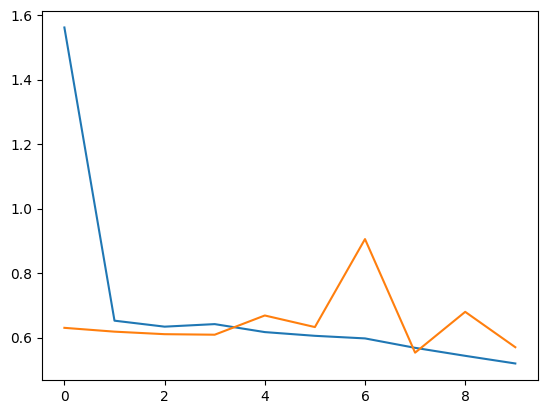

In [12]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.show()